In [1]:
import numpy as np
import matplotlib.pyplot as plt

This is a starter notebook for project 2 in TMA4320 Spring 2023. It is recommended that you make sure all code of this notebook runs as expected before you start working on the project. You can then use whatever parts of this notebook you see fit in your final submission. You do not have to use the code as it is handed out, feel free to use it differently.

<h1> Task 1 </h1>

Example of how to define a matrix as an array and calculate its SVD. We pass the `full_matrices = False` argument so that it does not calculate
more entries than necessary.

In [2]:
# Create matrix
A1 = np.array([[1000,1],[0,1],[0,0]])

# Calculate SVD
U,S,Vt = np.linalg.svd(A1, full_matrices = False)

# Print shapes 
print("Shape of U: ", U.shape) # Expect (3,2)

print("Shape of S: ", S.shape) # Expect (2,)

print("Shape of Vt: ", Vt.shape) # Expect (2,2)


Shape of U:  (3, 2)
Shape of S:  (2,)
Shape of Vt:  (2, 2)


<h1> Task 2 </h1>

We first load the data. Note that the files `train.npy` and `test.npy` should be in the same folder as this notebook.

The data is stored as `(number of pixels, number of classes, number of datapoints)`.
We have a total of $5000$ training data points for each class, and $800$ test datapoints for each class.


In [3]:
# Load the data and resclae
train = np.load('train.npy')/255.0
test = np.load('test.npy')/255.0

# Shapes are (number of pixels, number of classes, number of data)
print(train.shape) # Should be (784,10,5000)
print(test.shape) # Should be (784,10,800)


(784, 10, 5000)
(784, 10, 800)


Below is code that plot images on a grid. Feel free to use this or create a better one yourself.

In [4]:
def plotimgs(imgs, nplot = 4):
    """
    Plots the nplot*nplot first images in imgs on an nplot x nplot grid. 
    Assumes heigth = width, and that the images are stored columnwise
    input:
        imgs: (height*width,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
    """

    n = imgs.shape[1]
    m = int(np.sqrt(imgs.shape[0]))

    assert(n > nplot**2), "Need amount of data in matrix N > nplot**2"

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):

        # Break if we go out of bounds of the array
        if idx >= n:
            break

        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        axes[i,j].imshow(imgs[:,idx].reshape((m,m)), cmap = "gray")
    
    # Plot

    fig.tight_layout()
    plt.show()


We now plot the first 16 images of the $0$ class, which is accessed as `train[:,0,:]`. We can also acess for example the 2nd image of class $0$ as `train[:,0,1]`.

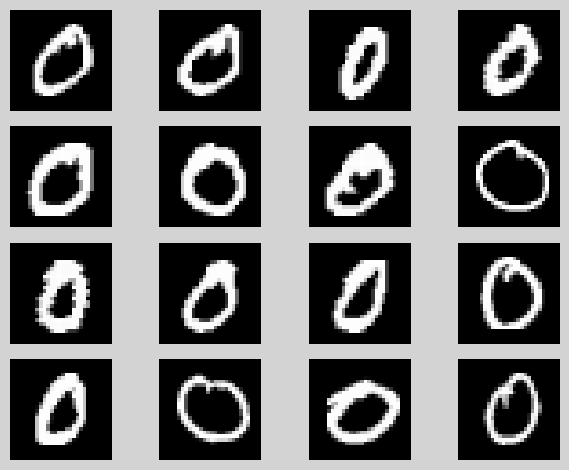

In [5]:
# Plot first 16 images of the zero integer
plotimgs(train[:,0,:], nplot = 4)

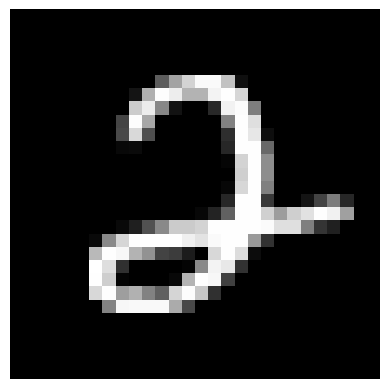

In [6]:
# Plot the second image of the 2 digit
# Note that we have to reshape it to be 28 times 28!
plt.imshow(train[:, 2, 1].reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()

The below code extracts $n = 1000$ datapoints from the training data of a chosen class and stores it in a $(m,n)$ array called `A` that we can for example apply the SVD to.

In [7]:
n = 1000 # Number of datapoints
c = 0 # Class

A = train[:,c,:n]

print(A.shape) # Expect (784,n)

(784, 1000)


<h1> Task 3 </h1>




Below is code that that generates a test set. We then test this function and plot a few datapoints and their corresponding labels.

In [8]:
def generate_test(test, digits = [0,1,2], N = 800):
    """
    Randomly generates test set.
    input:
        test: numpy array. Should be the test data loaded from file
        digits: python list. Contains desired integers
        N: int. Amount of test data for each class
    output:
        test_sub: (784,len(digits)*N) numpy array. Contains len(digits)*N images
        test_labels: (len(digits)*N) numpy array. Contains labels corresponding to the images of test_sub
    """

    assert N <= test.shape[2] , "N needs to be smaller than or equal to the total amount of available test data for each class"

    assert len(digits)<= 10, "List of digits can only contain up to 10 digits"

    # Arrays to store test set and labels
    test_sub = np.zeros((test.shape[0], len(digits)*N))
    test_labels = np.zeros(len(digits)*N)

    # Iterate over all digit classes and store test data and labels
    for i, digit in enumerate(digits):
        test_sub[:, i*N:(i+1)*N] = test[:,digit,:]
        test_labels[i*N:(i+1)*N] = digit

    # Indexes to be shuffled 
    ids = np.arange(0,len(digits)*N)

    # Shuffle indexes
    np.random.shuffle(ids)

    # Return shuffled data 
    return test_sub[:,ids], test_labels[ids]

Test data shape:  (784, 2400)
Test labels shape:  (2400,)
First 16 labels:  [1. 1. 0. 2. 2. 1. 0. 1. 0. 1. 1. 1. 1. 2. 2. 2.]


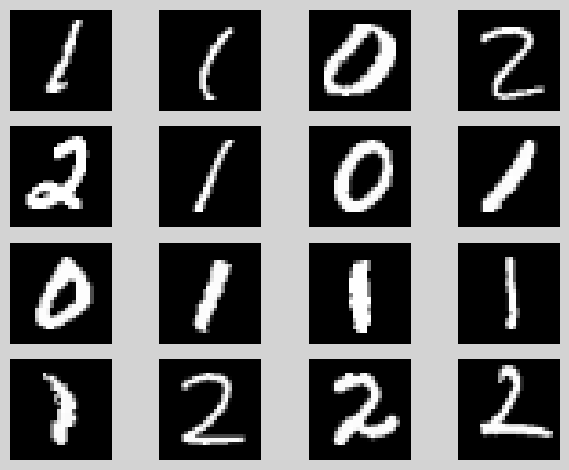

In [9]:
digits = [0,1,2]

A_test, A_labels = generate_test(test, digits = digits, N = 800)
print("Test data shape: ", A_test.shape) # Should be (784,2400)
print("Test labels shape: ", A_labels.shape) # Should be (2400)
print("First 16 labels: ", A_labels[:16])
plotimgs(A_test, nplot = 4)